In [2]:
%load_ext autoreload
%autoreload 2

from scipy.stats import binom, beta
import numpy as np

from contamination_estimation import VariantPosition, estimate_contamination
from plot import plot_result
# https://github.com/liguowang/dcon/blob/master/lib/DconModule/utils.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
VariantPosition(100,90,"HOM").log_contam_probability(0.1)

-2.02597397686619

In [27]:
from unittest.mock import MagicMock, patch


a=MagicMock()
a.assert_has_calls?

Signature: a.assert_has_calls(calls, any_order=False)
Docstring:
assert the mock has been called with the specified calls.
The `mock_calls` list is checked for the calls.

If `any_order` is False (the default) then the calls must be
sequential. There can be extra calls before or after the
specified calls.

If `any_order` is True then the calls can be in any order, but
they must all appear in `mock_calls`.
File:      ~/code/miniconda3/envs/bfx-dev/lib/python3.8/unittest/mock.py
Type:      method


Simulating: 0.0; Estimated: 0.005


/Users/douglas.wu/code/miniconda3/envs/bfx-dev/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:607: RuntimeWarning: divide by zero encountered in _beta_pdf
  return _boost._beta_pdf(x, a, b)


Simulating: 0.05; Estimated: 0.059
Simulating: 0.1; Estimated: 0.107
Simulating: 0.15000000000000002; Estimated: 0.154
Simulating: 0.2; Estimated: 0.198
Simulating: 0.25; Estimated: 0.25
Simulating: 0.30000000000000004; Estimated: 0.307
Simulating: 0.35000000000000003; Estimated: 0.354
Simulating: 0.4; Estimated: 0.403
Simulating: 0.45; Estimated: 0.455


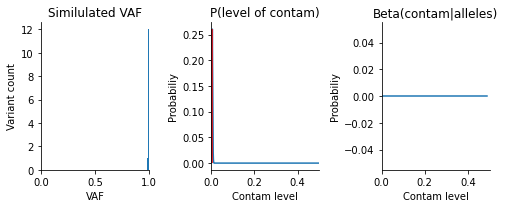

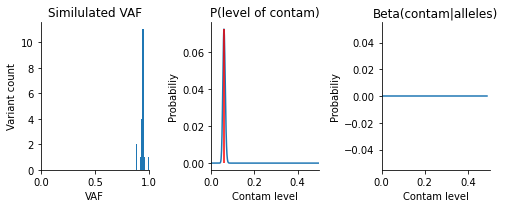

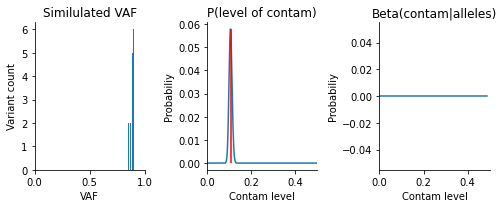

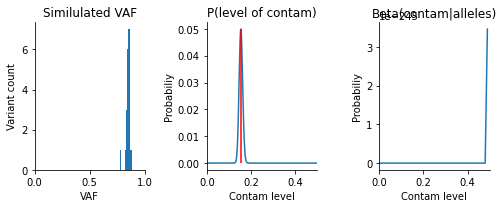

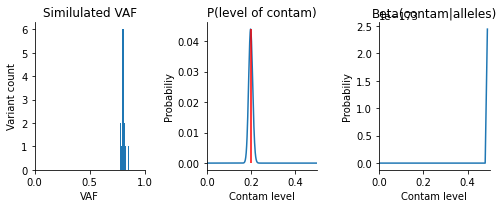

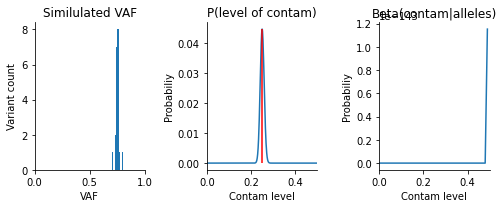

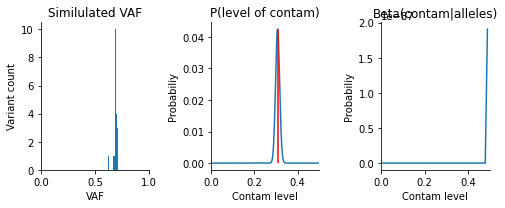

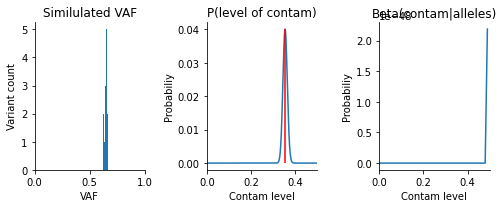

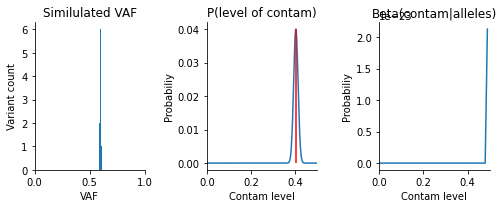

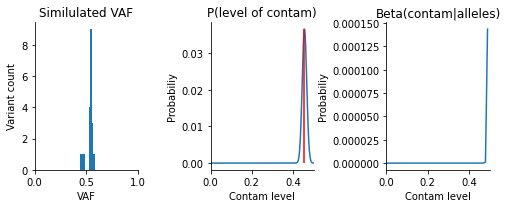

In [3]:
for simulated_contam in np.arange(0,0.5, 0.05):

    # simulate data
    vp = []
    for i in range(20):
        total_depth = np.random.randint(10,200)
        alt_depth = total_depth - max(0, total_depth - np.random.normal(loc=total_depth * (1-simulated_contam) ))
        vp.append(
            VariantPosition(total_depth, alt_depth, 'HOM')
        )
    
    dist=estimate_contamination(vp)
    sorted_likelihoods = sorted(dist.items(), key=lambda k: k[1]) # ascending sort
    print(f"Simulating: {simulated_contam}; Estimated: {sorted_likelihoods[-1][0]}")
    plot_result(vp, dist, sorted_likelihoods)
    

Simulating: 0.0; Estimated: 0.499
Simulating: 0.05; Estimated: 0.056
Simulating: 0.1; Estimated: 0.11
Simulating: 0.15000000000000002; Estimated: 0.16
Simulating: 0.2; Estimated: 0.216
Simulating: 0.25; Estimated: 0.257
Simulating: 0.30000000000000004; Estimated: 0.308
Simulating: 0.35000000000000003; Estimated: 0.356
Simulating: 0.4; Estimated: 0.417
Simulating: 0.45; Estimated: 0.462


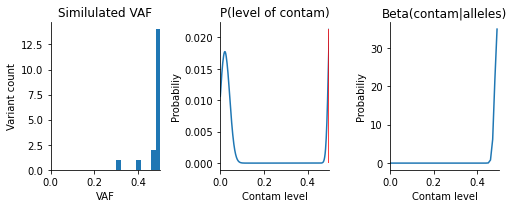

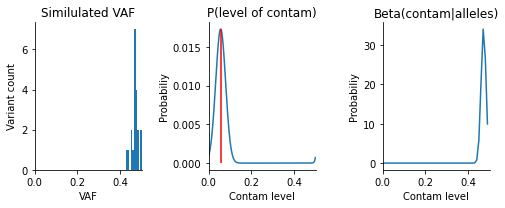

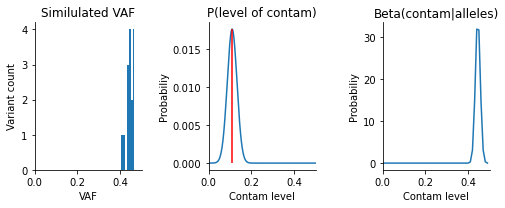

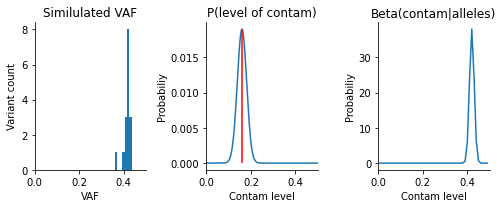

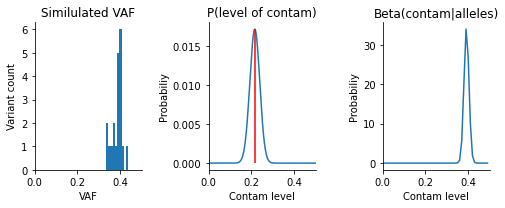

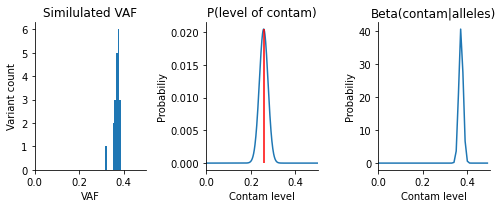

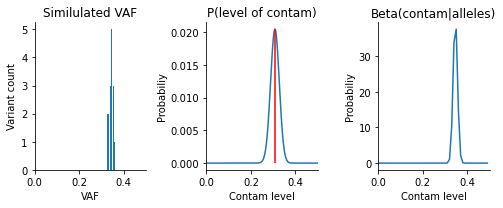

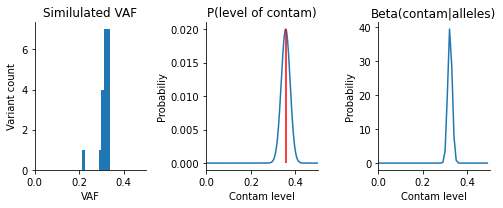

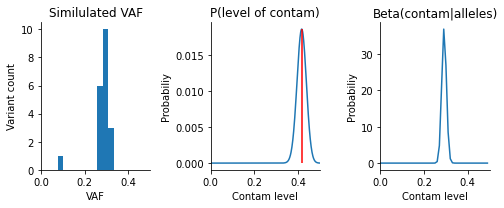

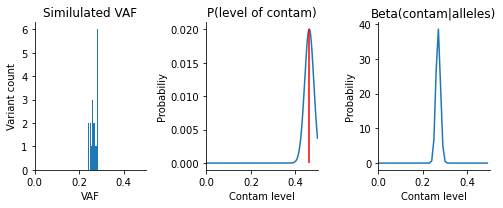

In [8]:
for simulated_contam in np.arange(0,0.5, 0.05):

    # simulate data
    vp = []
    for i in range(20):
        total_depth = np.random.randint(10,200)
        allele1_fraction = total_depth * 0.5
        alt_depth = total_depth / 2 
        alt_depth = np.random.normal(loc=alt_depth * (1-simulated_contam) )

        
        vp.append(
            VariantPosition(total_depth, alt_depth, 'HET')
        )
    
    dist=estimate_contamination(vp)
    sorted_likelihoods = sorted(dist.items(), key=lambda k: k[1]) # ascending sort
    print(f"Simulating: {simulated_contam}; Estimated: {sorted_likelihoods[-1][0]}")
    
    plot_result(vp, dist, sorted_likelihoods)